In [ ]:
#Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



In [ ]:
#Loading the dataset
data=pd.read_csv("/content/Life_expectancy_dataset.csv")
data.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV,GDP,Population,one_nine_thinness,five_nine_thinness,Income_composition_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#Dimension of the dataset
data_dim=data.shape
print("The nos of rows in the dataset:- ",data_dim[0])
print("The nos of columns in the dataset:- ",data_dim[1])

The nos of rows in the dataset:-  2938
The nos of columns in the dataset:-  22


In [ ]:
#Checking for null values
data_null=data.isnull().sum()
data_null

Country                           0
Year                              0
Status                            0
Life_expectancy                  10
Adult_Mortality                  10
infant_deaths                     0
Alcohol                         194
percentage_expenditure            0
Hepatitis_B                     553
Measles                           0
 BMI                             34
under_five_deaths                 0
Polio                            19
Total_expenditure               226
Diphtheria                       19
 HIV                              0
GDP                             448
Population                      652
one_nine_thinness                34
five_nine_thinness               34
Income_composition_resources    167
Schooling                       163
dtype: int64

In [ ]:
data.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV,GDP,Population,one_nine_thinness,five_nine_thinness,Income_composition_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
#Removing spaces from column names
data.columns = data.columns.str.replace(' ', '')

In [ ]:
#checking for numerical columns
def check_num_columns(df):
  num_col=[]
  for col in df:
    if df[col].dtypes =='int' or df[col].dtypes =='float':
      num_col.append(col)

  return num_col


numerical_columns=check_num_columns(data)
print("The numerical are as follows:- ")
print(numerical_columns)

The numerical are as follows:- 
['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV', 'GDP', 'Population', 'one_nine_thinness', 'five_nine_thinness', 'Income_composition_resources', 'Schooling']


In [ ]:
#dealing with null values for the numerical values

def mean_imp(df):
  for column in df.select_dtypes(include=['number']).columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

  return df


print(mean_imp(data))

          Country  Year      Status  Life_expectancy  Adult_Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  \
0                62     0.01               71

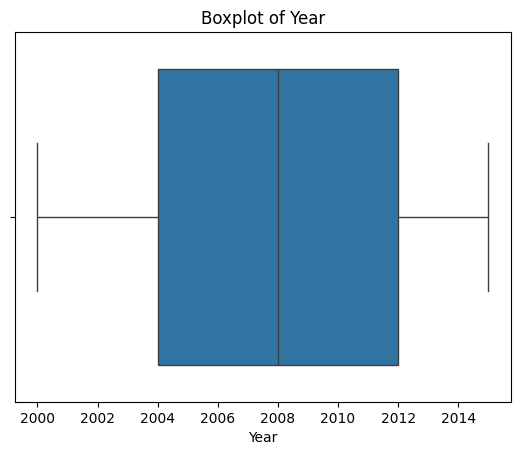

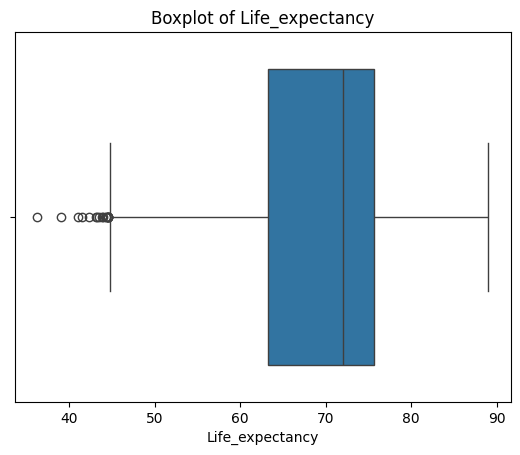

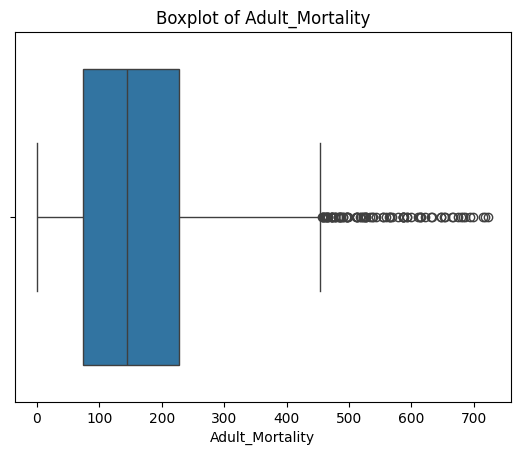

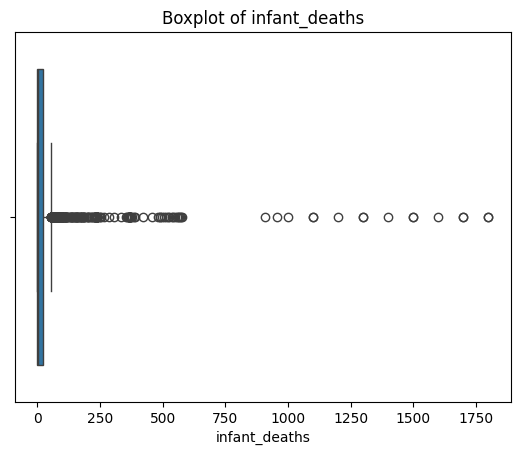

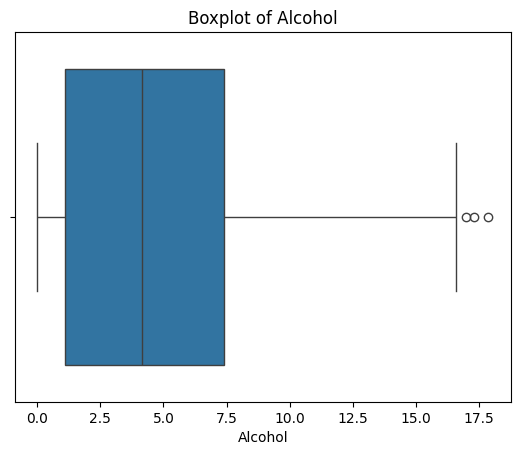

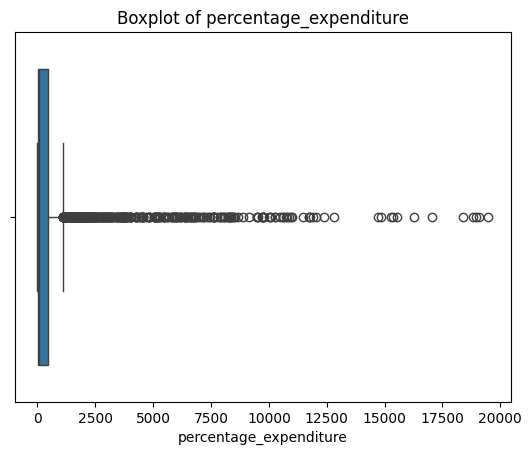

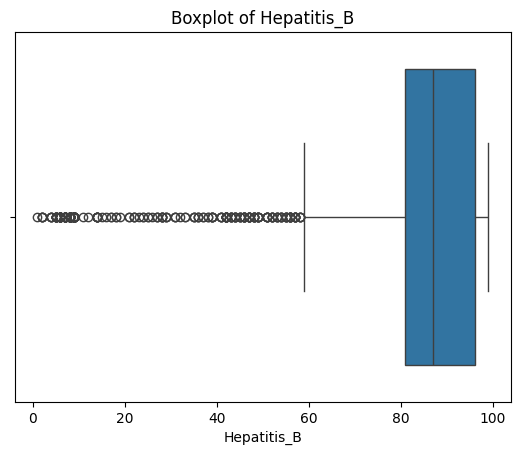

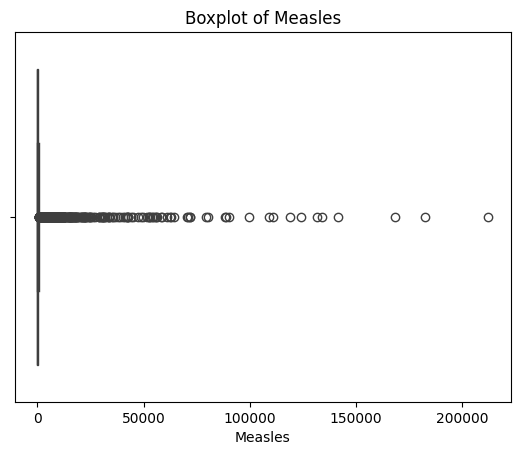

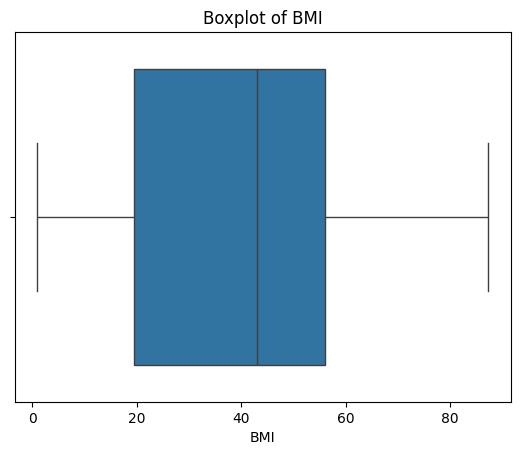

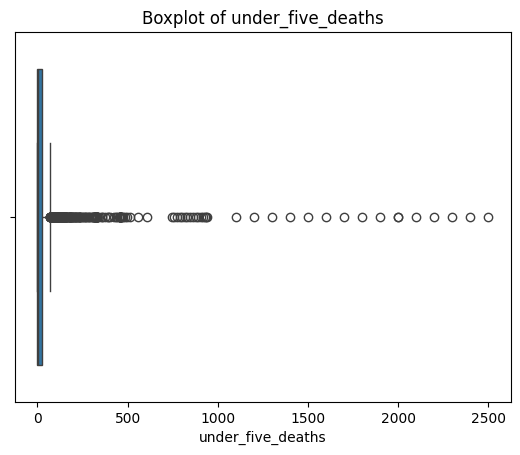

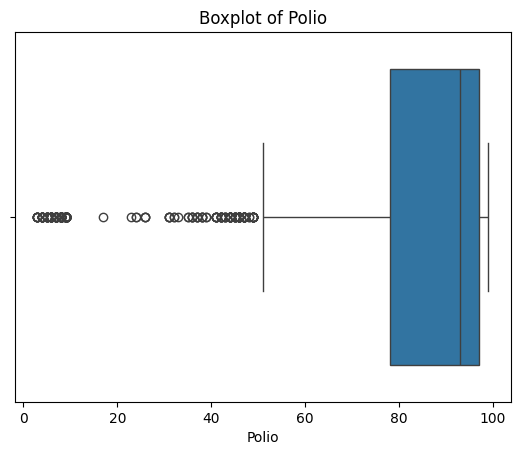

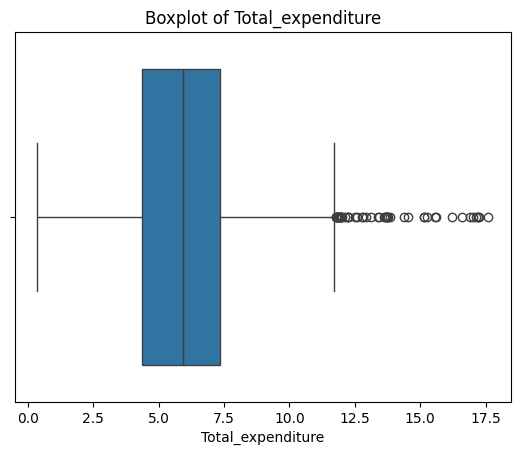

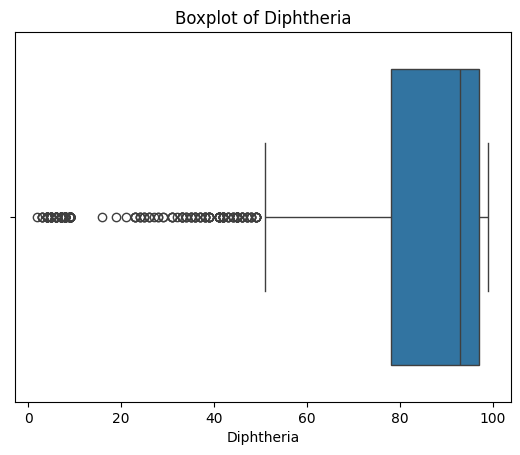

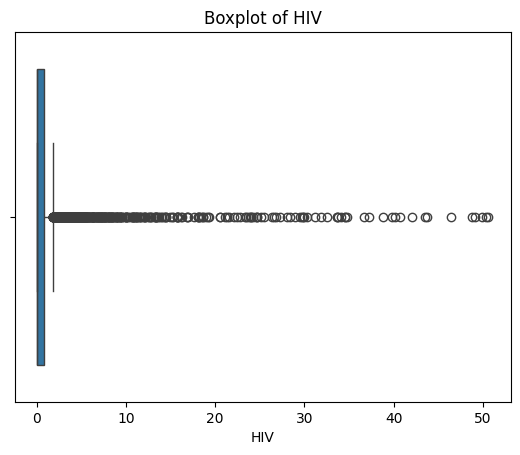

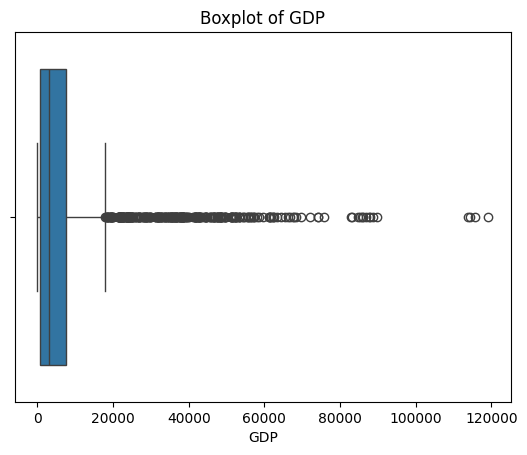

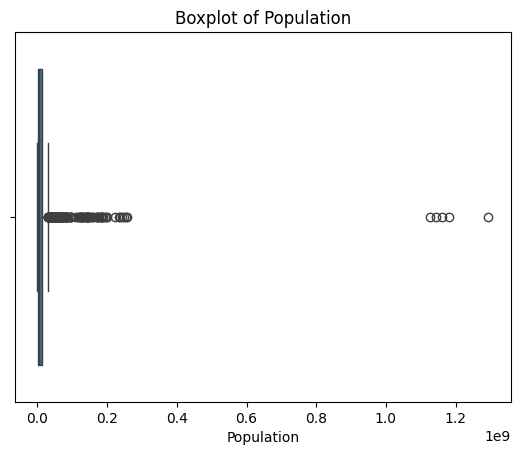

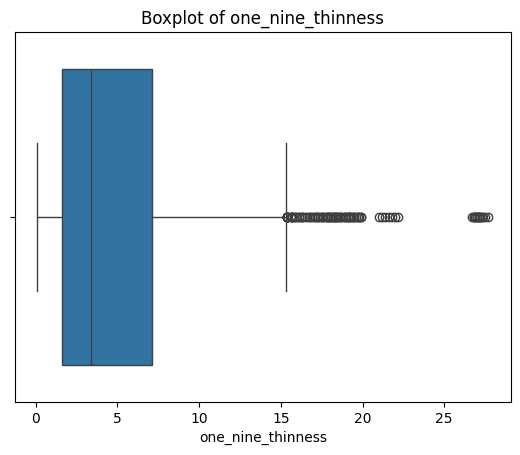

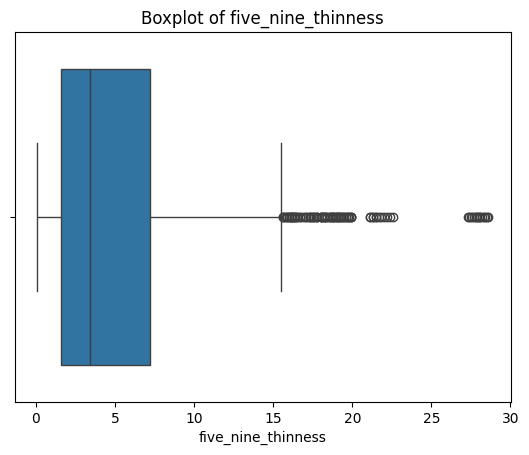

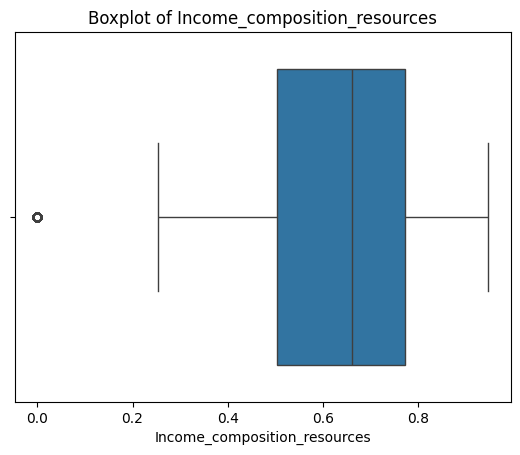

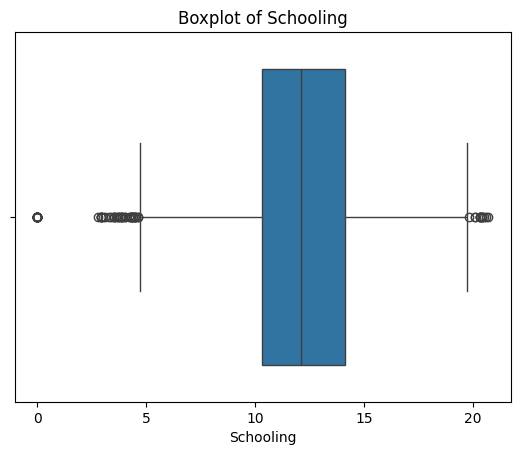

In [ ]:
#Outlier Detection
OD_data=data.drop(['Country','Status'],axis=1)
for col in OD_data.columns:
  sns.boxplot(x=col,data=OD_data)
  plt.title('Boxplot of {0}'.format(col))
  plt.show()

In [ ]:
#Detecting  the outliers
numerical_cols=data.drop(['Country', 'Status'], axis=1)
zscore_data=numerical_cols.apply(zscore)
outlier_rows=(zscore_data > 3) | (zscore_data < -3)
total_nos_outliers=outlier_rows.sum()


print("Number of outliers in each column are as follows:- ")
print(total_nos_outliers)

Number of outliers in each column are as follows:- 
Year                              0
Life_expectancy                   2
Adult_Mortality                  40
infant_deaths                    37
Alcohol                           5
percentage_expenditure           84
Hepatitis_B                     161
Measles                          48
BMI                               0
under_five_deaths                34
Polio                           172
Total_expenditure                26
Diphtheria                      170
HIV                              69
GDP                              91
Population                       24
one_nine_thinness                54
five_nine_thinness               57
Income_composition_resources    130
Schooling                        28
dtype: int64


In [ ]:
#Removal Of Outliers
data_1=data[~outlier_rows.any(axis=1)]


print("Shape after removing outliers:", data_1.shape)

Shape after removing outliers: (2184, 22)


In [ ]:
data_1.isnull().sum()

Country                         0
Year                            0
Status                          0
Life_expectancy                 0
Adult_Mortality                 0
infant_deaths                   0
Alcohol                         0
percentage_expenditure          0
Hepatitis_B                     0
Measles                         0
BMI                             0
under_five_deaths               0
Polio                           0
Total_expenditure               0
Diphtheria                      0
HIV                             0
GDP                             0
Population                      0
one_nine_thinness               0
five_nine_thinness              0
Income_composition_resources    0
Schooling                       0
dtype: int64

In [ ]:
#Concat the num values
for col in numerical_columns:
  data=data.drop([col],axis=1)

#Dropping the Columns present in both df's to ensure that there is no duplicate columns
data_1=data_1.drop(['Country','Status'],axis=1)
data_1

#creating a copy of the numerical data on which Data Scaling mehods will be used
data_1_scaled=data_1.copy()
#Concatenating the 2 Df's(i.e the categorical data as well as the numerical data)
clean_data_non_scaled=pd.concat([data, data_1], axis=1)



In [ ]:
data.head()

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing


In [ ]:
data_1.head()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV,GDP,Population,one_nine_thinness,five_nine_thinness,Income_composition_resources,Schooling
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
14,2001,55.3,316.0,88,0.01,10.574728,63.0,8762,12.6,122,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
15,2000,54.8,321.0,88,0.01,10.424960,62.0,6532,12.2,122,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5


In [ ]:
#Checking for null values in the the combined  Df
clean_data_non_scaled.isnull().sum()

Country                           0
Status                            0
Year                            754
Life_expectancy                 754
Adult_Mortality                 754
infant_deaths                   754
Alcohol                         754
percentage_expenditure          754
Hepatitis_B                     754
Measles                         754
BMI                             754
under_five_deaths               754
Polio                           754
Total_expenditure               754
Diphtheria                      754
HIV                             754
GDP                             754
Population                      754
one_nine_thinness               754
five_nine_thinness              754
Income_composition_resources    754
Schooling                       754
dtype: int64

In [ ]:
#Replacing the null values with mean value
print(mean_imp(clean_data_non_scaled))

          Country      Status         Year  Life_expectancy  Adult_Mortality  \
0     Afghanistan  Developing  2007.868132        70.192124       153.882954   
1     Afghanistan  Developing  2014.000000        59.900000       271.000000   
2     Afghanistan  Developing  2013.000000        59.900000       268.000000   
3     Afghanistan  Developing  2012.000000        59.500000       272.000000   
4     Afghanistan  Developing  2007.868132        70.192124       153.882954   
...           ...         ...          ...              ...              ...   
2933     Zimbabwe  Developing  2007.868132        70.192124       153.882954   
2934     Zimbabwe  Developing  2007.868132        70.192124       153.882954   
2935     Zimbabwe  Developing  2007.868132        70.192124       153.882954   
2936     Zimbabwe  Developing  2007.868132        70.192124       153.882954   
2937     Zimbabwe  Developing  2007.868132        70.192124       153.882954   

      infant_deaths   Alcohol  percenta

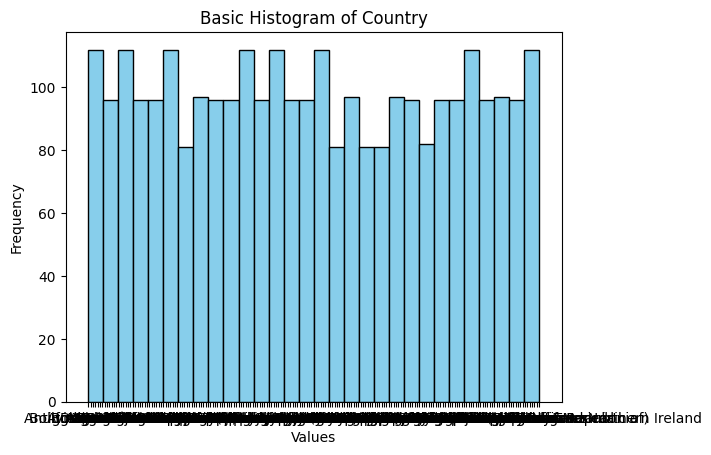

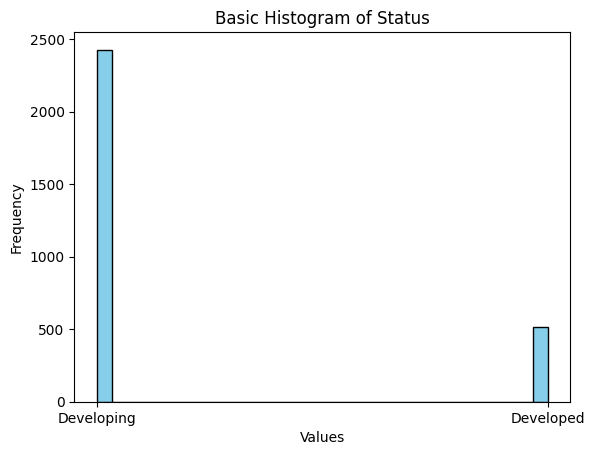

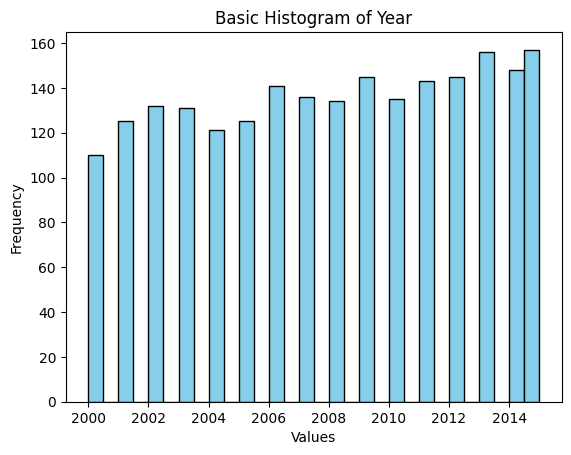

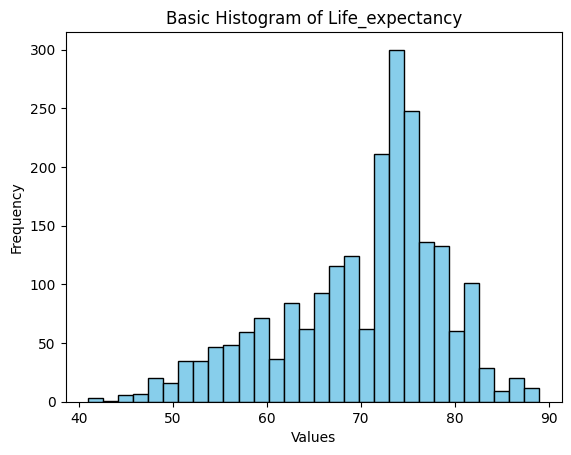

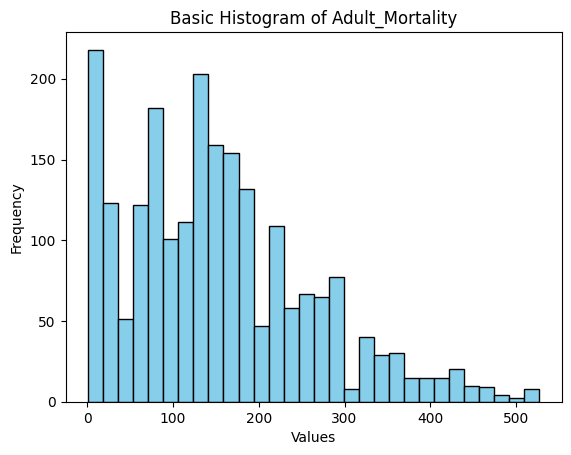

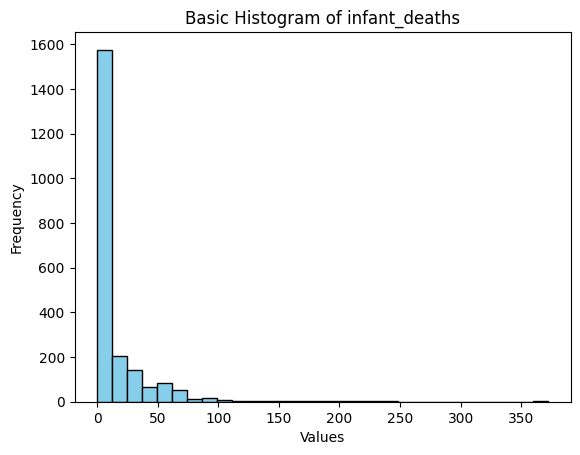

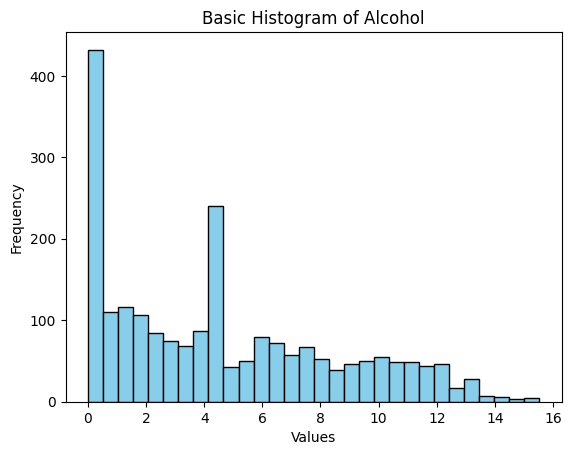

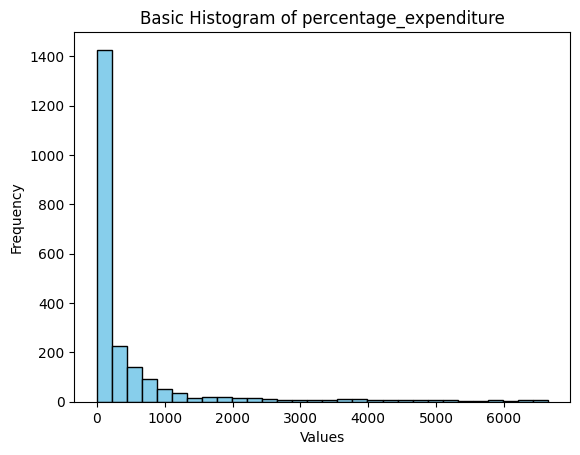

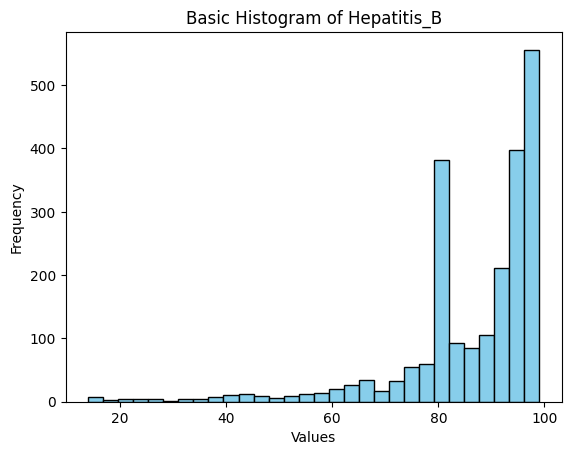

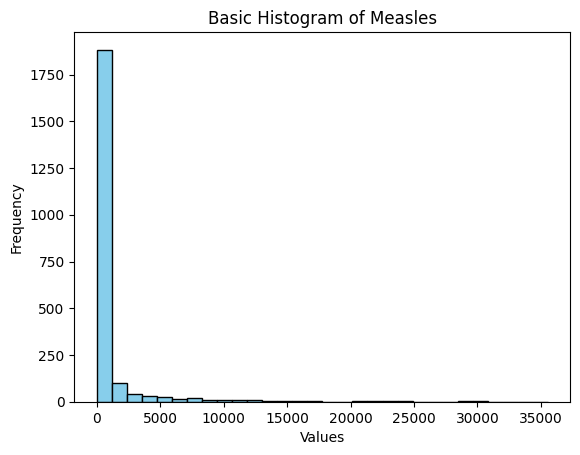

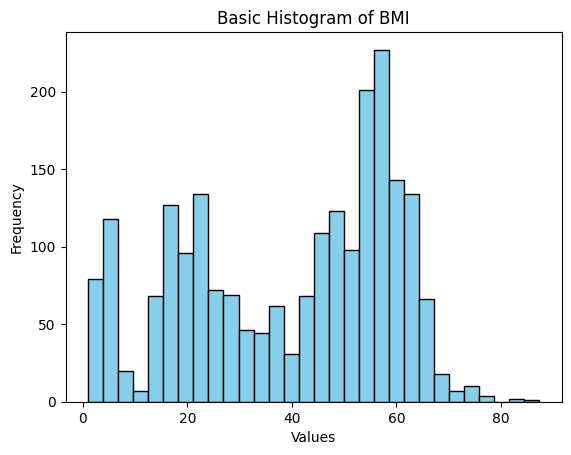

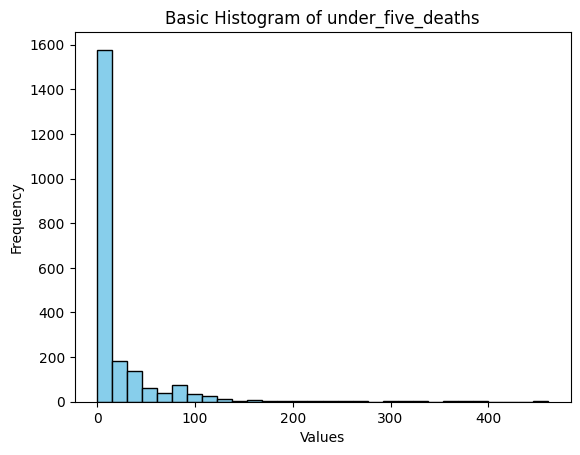

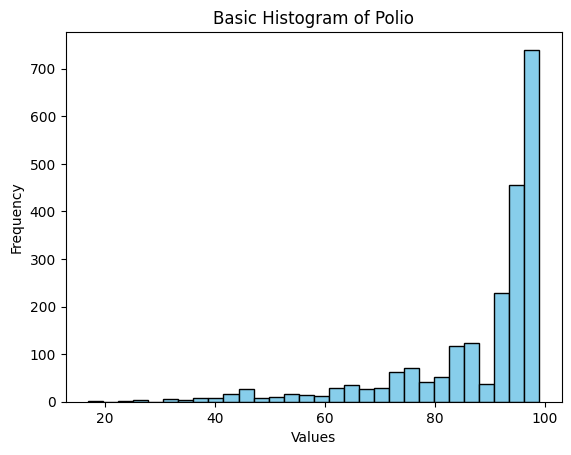

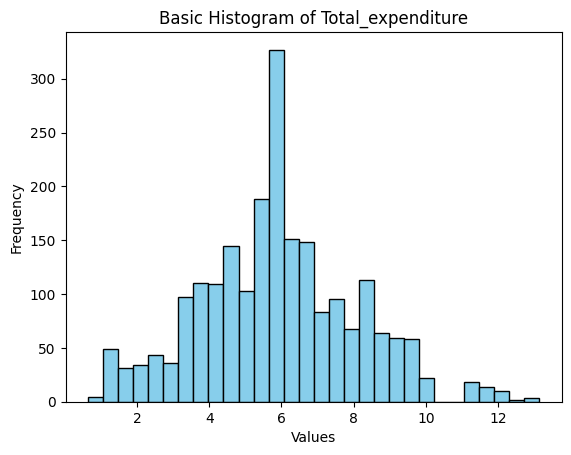

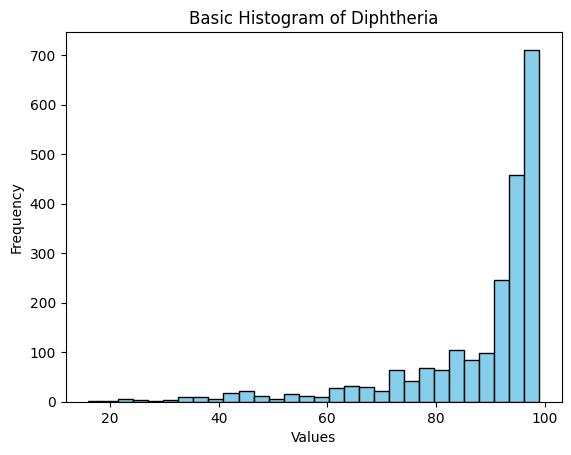

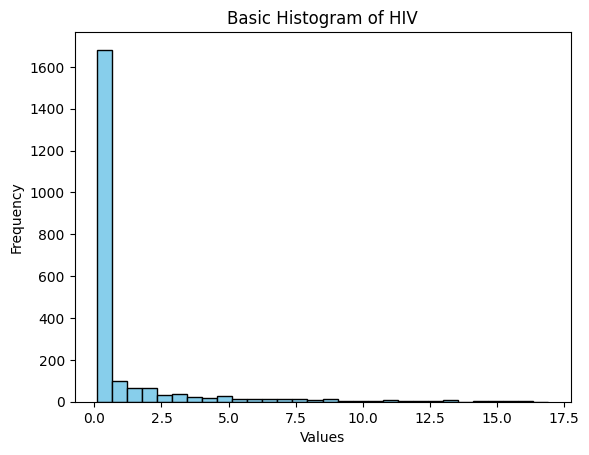

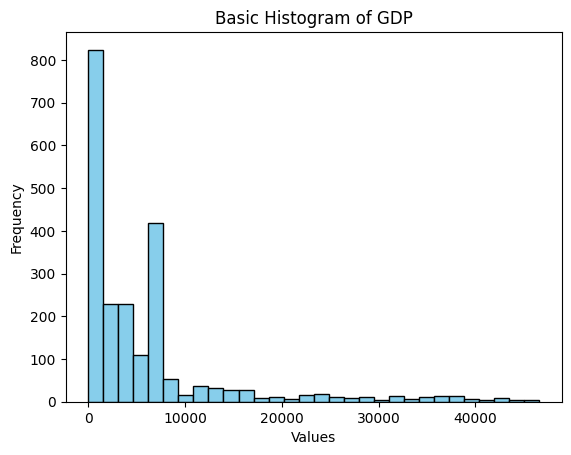

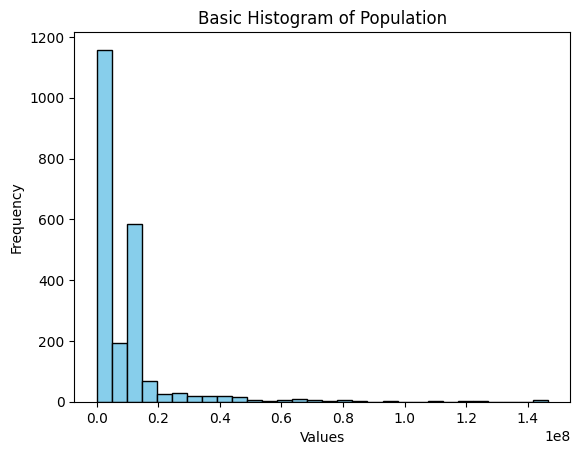

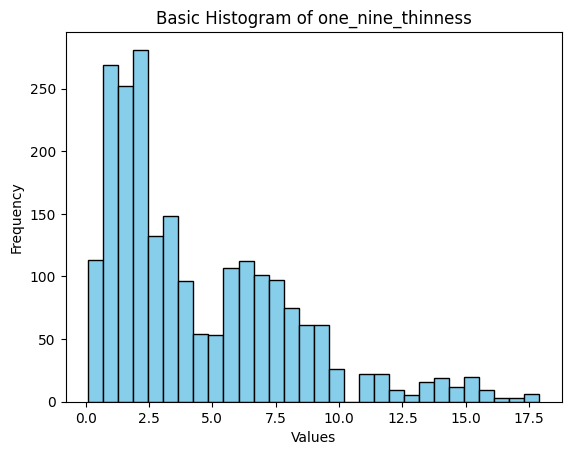

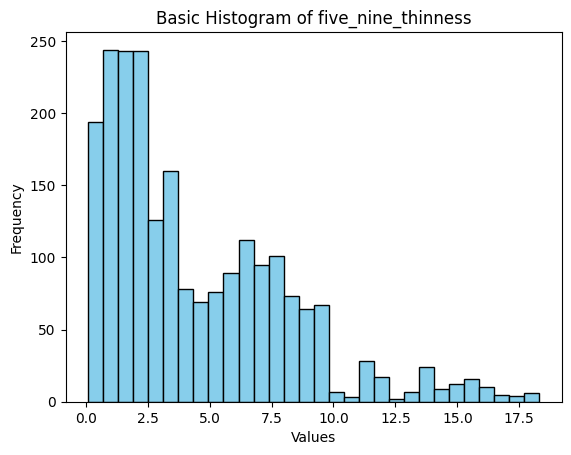

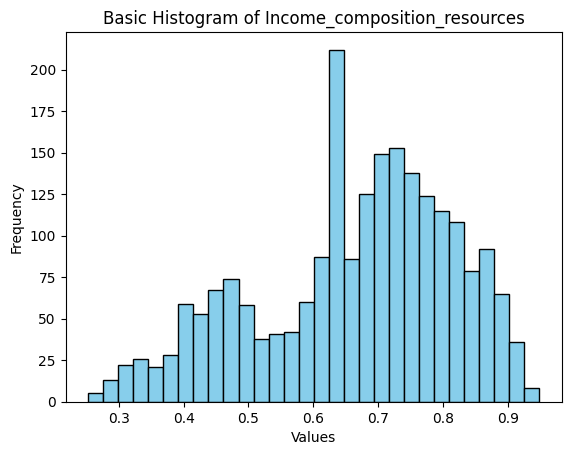

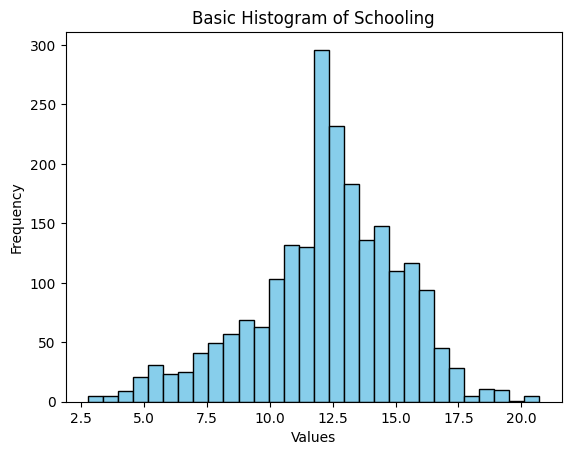

In [ ]:
#Plotting the distribution to check if datascaling needs to be done
for col in data_1_scaled.columns:
  plt.hist(data_1_scaled[col], bins=30, color='skyblue', edgecolor='black')
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.title('Basic Histogram of {0}'.format(col))
  plt.show()


In [ ]:
#Separating the columns that are not required from the main dataset
x=data_1_scaled[['Total_expenditure','Schooling','Year']]
data_1_scaled=data_1_scaled.drop(['Schooling','Total_expenditure','Year'],axis=1)


,Country,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Diphtheria,HIV,GDP,Population,one_nine_thinness,five_nine_thinness,Income_composition_resources
0,Afghanistan,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476
2,Afghanistan,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470
3,Afghanistan,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463
4,Afghanistan,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Data Scaling
for col in data_1_scaled.columns:
  scaler=StandardScaler()
  scaler.fit(data_1_scaled[[col]])
  data_1_scaled[[col]]=scaler.transform(data_1_scaled[[col]])

data_1_scaled.head()

ValueError: could not convert string to float: 'Afghanistan'

In [ ]:
#Concatenating the df's
clean_data_scaled=pd.concat([x, data_1_scaled], axis=1)
clean_data_scaled

In [ ]:
#Encoding

#Label Encoder
l_encoder=LabelEncoder()
clean_data_non_scaled['Status']=l_encoder.fit_transform(clean_data_non_scaled['Status'])
clean_data_scaled['Status']=l_encoder.fit_transform(clean_data_scaled[['Status']])


clean_data_non_scaled['Status'].head()
clean_data_scaled['Status'].head()


#One hot Encoding

#clean_data=pd.get_dummies(clean_data, columns = ['Country'])
#clean_data.head()

Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linearRegression(df, target):

    x = df.drop(target, axis=1)
    y = df[target]

    # Splitting the dataset into training and testing sets
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

    # Initializing the linear regression model
    model = LinearRegression()

    # Training the model
    model.fit(xtrain, ytrain)

    # Making predictions on the test set
    ypred = model.predict(xtest)

    # Calculating mean squared error and R-squared
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)

    # Displaying metrics
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

In [ ]:
linearRegression(clean_data_scaled,'Life_expectancy')

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def randomForest(df,target):

    x = df.drop(target, axis=1)
    y = df[target]

    # Splitting the dataset into training and testing sets
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

    # Initializing the Random Forest model
    model = RandomForestRegressor( n_estimators=100,random_state=42)

    # Training the model
    model.fit(xtrain, ytrain)

    # Making predictions on the test set
    ypred = model.predict(xtest)

    # Calculating accuracy
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)

    # Displaying metrics

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

In [ ]:
randomForest(clean_data_scaled,'Life_expectancy')

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def knn(df, feature, target, k=3):

    x = df[feature]
    y = df[target]

    # Splitting the dataset into training and testing sets
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

    # Initializing the KNN model
    model = KNeighborsClassifier(n_neighbors=k)

    # Training the model
    model.fit(xtrain, ytrain)

    # Making predictions on the test set
    ypred = model.predict(xtest)

    # Calculating accuracy
    accuracy = accuracy_score(ytest, ypred)

    # Displaying metrics
    print("Accuracy:", accuracy)
    print("\nConfusion Matrix:")
    print(confusion_matrix(ytest, ypred))
    print("\nClassification Report:")
    print(classification_report(ytest, ypred))

In [ ]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def train_ffn_model(df):
    # Assume 'Life_expectancy' is the target variable
    X = df.drop('Life_expectancy', axis=1).values
    y = df['Life_expectancy'].values.reshape(-1, 1)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build the Feedforward Neural Network model
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Output layer for regression task
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    r=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error on Test Set: {mse}')
    r2 = r2_score(y_test, predictions)
    print(f'R-squared: {r2}')

    residuals = y_test - predictions
    sns.histplot(residuals, kde=True)
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    plt.plot(r.history['loss'])
    plt.plot(r.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    # plt.scatter(y_test, predictions,marker='D')
    # plt.xlabel('Actual Values')
    # plt.ylabel('Predicted Values')
    # plt.title('Actual vs. Predicted Values')
    # plt.show()

    plt.scatter(y_test, predictions, marker='D', color='blue', edgecolors='black')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()




In [ ]:
train_ffn_model(clean_data_scaled)